# IZVESTIA

In [1]:
from string import punctuation
from collections import Counter
import datetime
import matplotlib.pyplot as plt

In [2]:
import sys

In [3]:
sys.path.append('C:\\projects\\datascience\\proj_news_viz\\nlp\\experiments\\exp-001_Prepare_csv_for_EDA\\scripts')

In [4]:
from reader import CSVCorpusReader

In [5]:
# Создадим объект чтения корпуса
data = CSVCorpusReader('../../../data/interim')

In [6]:
# Новостные источники
data.categories()

['gazeta', 'interfax', 'iz', 'meduza', 'ria', 'rt', 'tass']

In [7]:
# Имеющиеся файлы в корпусе
data.fileids()

['gazeta/gazeta.csv',
 'interfax/interfax.csv',
 'iz/iz.csv',
 'meduza/meduza.csv',
 'ria/ria.csv',
 'rt/rt.csv',
 'tass/tass.csv']

In [8]:
# Проверим размер нашего сета, который будем обрабатывать
list(data.sizes(None, 'iz'))

[(FileSystemPathPointer('C:\\projects\\datascience\\proj_news_viz\\nlp\\data\\interim\\iz\\iz.csv'),
  342723850)]

## Общий предварительный анализ

In [9]:
# Предварительный анализ всех файлов из каталога новостного источника
data.describe(None, 'iz')

{'Количество файлов': 1,
 'Количество источников новостей': 1,
 'Количество обработанных новостей': 86602,
 'Количество предложений': 1035024,
 'Количество слов': 30230658,
 'Количество токенов (словарь)': 556504,
 'Коэффициент лексического разнообразия (lexical diversity)': 54.322445121688254,
 'Среднее количество новостей по отношению к файлам': 86602.0,
 'Среднее количество предложений в новостях': 11.951502274774255,
 'Начальная дата в обработке': '2001-06-28 16:51:00',
 'Конечная дата в обработке': '2017-12-26 23:58:25',
 'Количество повторяющихся новостей': 1289,
 'Количество пустых новостных элементов': 1268,
 'Время обработки в секундах': 303.35374426841736}

## EDA

In [10]:
list_data = list(data.docs(None, 'iz'))

In [11]:
# Так выглядет датасет
list_data[:5]

[OrderedDict([('date', '2017-01-24 18:24:00'),
              ('url',
               'https://iz.ru/699785/nataliia-portiakova/chtoby-pomnili'),
              ('edition', '-'),
              ('topics', 'Мир'),
              ('authors', 'Наталия Портякова'),
              ('title', 'Чтобы помнили'),
              ('text',
               'В Европейском\xa0парламенте\xa0(ЕП) 24 января прошла официальная церемония памяти жертв холокоста, приуроченная к одноименному международному дню (отмечается 27 января). Главный посыл ее участников свелся к тому, что мир обязан не только чтить невинно убитых —\xa0а их было свыше 6 млн\xa0человек, —\xa0но и в том, чтобы не позволить экстремизму любого толка вновь поднять голову.nМероприятия, посвященные памяти жертв холокоста, проходят в Европе регулярно. Правда, из года в год социальный и политический контекст, на фоне которого Европа вспоминает жертв преступлений нацизма, становится всё\xa0более тревожным.nВице-президент Европейского парламента Мэред Ма

In [0]:
# Можно в пандас загрузить и посмотреть

In [12]:
import pandas as pd

In [13]:
df = pd.DataFrame(list_data)

In [14]:
df.head()

,date,url,edition,topics,authors,title,text,reposts_fb,reposts_vk,reposts_ok,reposts_twi,reposts_lj,reposts_tg,likes,views,comm_count,None
0,2017-01-24 18:24:00,https://iz.ru/699785/nataliia-portiakova/chtob...,-,Мир,Наталия Портякова,Чтобы помнили,В Европейском парламенте (ЕП) 24 января прошла...,-,-,-,-,-,-,-,-,-,[]
1,2017-11-23 23:30:00,https://iz.ru/695670/izru-poluchil-premiiu-runeta,-,Пресс-релизы,,IZ.ru получил премию Рунета,"IZ.ru стал победителем в номинации «Культура, ...",-,-,-,-,-,-,-,-,-,[]
2,2017-11-25 23:49:47,https://iz.ru/675449/2017-11-25/chislo-mashin-...,-,Общество,,Число машин с «мигалками» увеличили в Совфеде,"Президент России Владимир Путин подписал указ,...",-,-,-,-,-,-,-,-,-,[]
3,2017-11-25 23:47:03,https://iz.ru/675448/2017-11-25/kudrin-zaiavil...,-,Экономика,,Кудрин заявил о подготовке проекта развития РФ...,"Бывший министр финансов России, глава Центра с...",-,-,-,-,-,-,-,-,-,[]
4,2017-11-25 23:46:48,https://iz.ru/675447/2017-11-25/gollandetc-kup...,-,Мир,,Голландец купил акварель Гитлера за 75 центов,"Женщина, пожелавшая остаться неизвестной, отда...",-,-,-,-,-,-,-,-,-,[]


### Обработка словаря

In [15]:
# Соберем токены
tokens = data.gettokens

In [16]:
punctuation = list(punctuation)

In [17]:
punctuation += ['«','»','—', 'n','»,','».', '–', '...']

In [18]:
garbage_words = ['nранее', 'nв', 'nпо', 'nтакже','u','n—', 'nn']

In [19]:
tokens = {item:tokens[item] for item in tokens if item not in punctuation}

In [20]:
tokens = {item:tokens[item] for item in tokens if item not in garbage_words}

In [21]:
stopwords_01 = open('../../../data/another/stopwords.txt', 'r', encoding='UTF-8')
stopwords_01 = stopwords_01.read().split('\n')
stopwords_02 = open('../../../data/another/stopwords_02.txt', 'r', encoding='UTF-8')
stopwords_02 = stopwords_02.read().split('\n')

In [22]:
stopwords = stopwords_01 + stopwords_02

In [23]:
tokens_without_stopwords = {item:tokens[item] for item in tokens if item not in stopwords}

### Аналитика по словам

#### Топ-20 слов без удаления стоп-слов

In [24]:
Counter(tokens).most_common(20)

[('в', 1023147),
 ('и', 622238),
 ('на', 438941),
 ('не', 290737),
 ('что', 273874),
 ('с', 258977),
 ('по', 233577),
 ('а', 115497),
 ('как', 109874),
 ('из', 107294),
 ('о', 106909),
 ('к', 105843),
 ('это', 99616),
 ('для', 97631),
 ('за', 94604),
 ('но', 86852),
 ('он', 78569),
 ('от', 77801),
 ('его', 75682),
 ('у', 69699)]

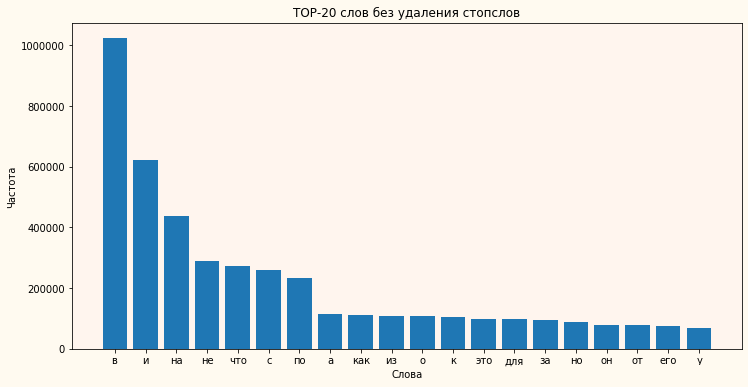

In [25]:
x = dict(Counter(tokens).most_common(20)).keys()
y = dict(Counter(tokens).most_common(20)).values()

fig, ax = plt.subplots()

ax.bar(x, y)
ax.set_title('TOP-20 слов без удаления стопслов')
ax.set_ylabel('Частота')
ax.set_xlabel('Слова')

ax.set_facecolor('seashell')
fig.set_facecolor('floralwhite')
fig.set_figwidth(12)    #  ширина Figure
fig.set_figheight(6)    #  высота Figure


plt.show()

#### Топ-20 слов после удаления стоп-слов

In [26]:
Counter(tokens_without_stopwords).most_common(20)

[('россии', 64151),
 ('br', 53670),
 ('сша', 29677),
 ('рублей', 27389),
 ('заявил', 26935),
 ('словам', 26039),
 ('тыс', 24879),
 ('рф', 23104),
 ('известиям', 22701),
 ('млн', 20917),
 ('страны', 19533),
 ('сообщает', 18757),
 ('области', 17885),
 ('1', 17652),
 ('компании', 17313),
 ('глава', 17052),
 ('b', 17000),
 ('президента', 16440),
 ('власти', 15575),
 ('решение', 15274)]

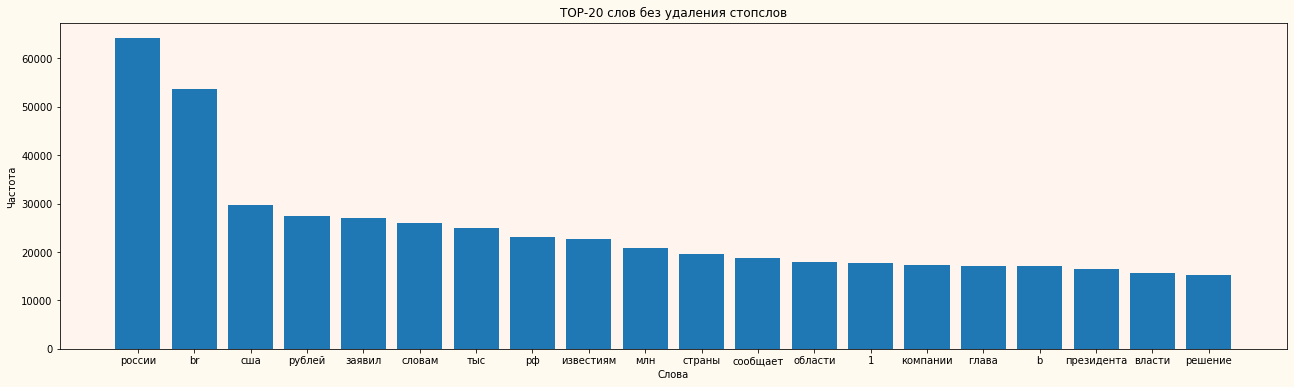

In [27]:
x = dict(Counter(tokens_without_stopwords).most_common(20)).keys()
y = dict(Counter(tokens_without_stopwords).most_common(20)).values()

fig, ax = plt.subplots()

ax.bar(x, y)
ax.set_title('TOP-20 слов без удаления стопслов')
ax.set_ylabel('Частота')
ax.set_xlabel('Слова')

ax.set_facecolor('seashell')
fig.set_facecolor('floralwhite')
fig.set_figwidth(22)    #  ширина Figure
fig.set_figheight(6)    #  высота Figure


plt.show()

## Рубрики в разрезе новостей

### Количество рубрик

In [28]:
list_topics = list(data.listcolumns(None, 'iz', 'topics'))

In [29]:
len(set(list_topics))

34

### Рубрики в разрезе количества новостей

In [30]:
Counter(list_topics).most_common(34)

[('Мир', 23876),
 ('Общество', 23266),
 ('Политика', 9289),
 ('Экономика', 7828),
 ('Страна', 7736),
 ('Спорт', 5789),
 ('Культура', 5002),
 ('Армия', 1221),
 ('Наука', 1150),
 ('Интернет', 911),
 ('Туризм', 79),
 ('Транспорт', 63),
 ('Здоровье', 50),
 ('Авто', 48),
 ('Россия - регионы', 48),
 ('Инновации', 42),
 ('День в истории', 28),
 ('Образование', 26),
 ('Недвижимость', 26),
 ('Новости компаний', 21),
 ('Финансы', 21),
 ('Среда для жизни', 15),
 ('Китай', 14),
 ('Потребительский рынок', 9),
 ('Art Briz', 9),
 ('Вкусно!', 8),
 ('Происшествия', 6),
 ('Финансовая грамотность', 6),
 ('Стиль', 4),
 ('Пресс-релизы', 3),
 ('Профсоюзы', 3),
 ('Спецпроекты', 2),
 ('День Победы', 2),
 ('Деловая среда', 1)]

## Распределение количества новостей по месяцам

### Удаление дубликатов

In [31]:
# Новый словарь, ключами которого будут новости, таким образом будет создан
# новый словарь, без дубликатов
news_by_dict = {i['text']: i for i in list_data}
new_items = list(news_by_dict.values())

In [32]:
# Проверь, что количество дубликатов совпало с тем, что были в предварительном анализе
# все верно
len(list_data) - len(new_items)

1289

### Получение распределения

In [33]:
def getMonthDate(date):
  """
  Возвращает дату в формате ММ-ГГГГ
  """
  date = datetime.datetime.strptime(date, "%Y-%m-%d %H:%M:%S")
  return '-'.join(['0' + str(date.month) if date.month<10 else str(date.month), str(date.year)])

In [34]:
# Подсчет количества новостей в разрезе месяца и года
list_dates = [getMonthDate(x['date']) for x in new_items]

In [35]:
month_year = Counter(list_dates)

In [36]:
len(month_year)

76

In [37]:
month_year.most_common(20)

[('07-2017', 8979),
 ('12-2017', 8866),
 ('09-2017', 6112),
 ('10-2017', 4004),
 ('05-2017', 3618),
 ('09-2016', 3473),
 ('04-2009', 2548),
 ('05-2009', 2482),
 ('04-2008', 2392),
 ('06-2009', 2348),
 ('10-2011', 2265),
 ('12-2011', 2213),
 ('05-2008', 2187),
 ('03-2009', 2099),
 ('11-2011', 2099),
 ('04-2017', 2030),
 ('09-2011', 1973),
 ('11-2017', 1825),
 ('10-2012', 1785),
 ('11-2012', 1568)]

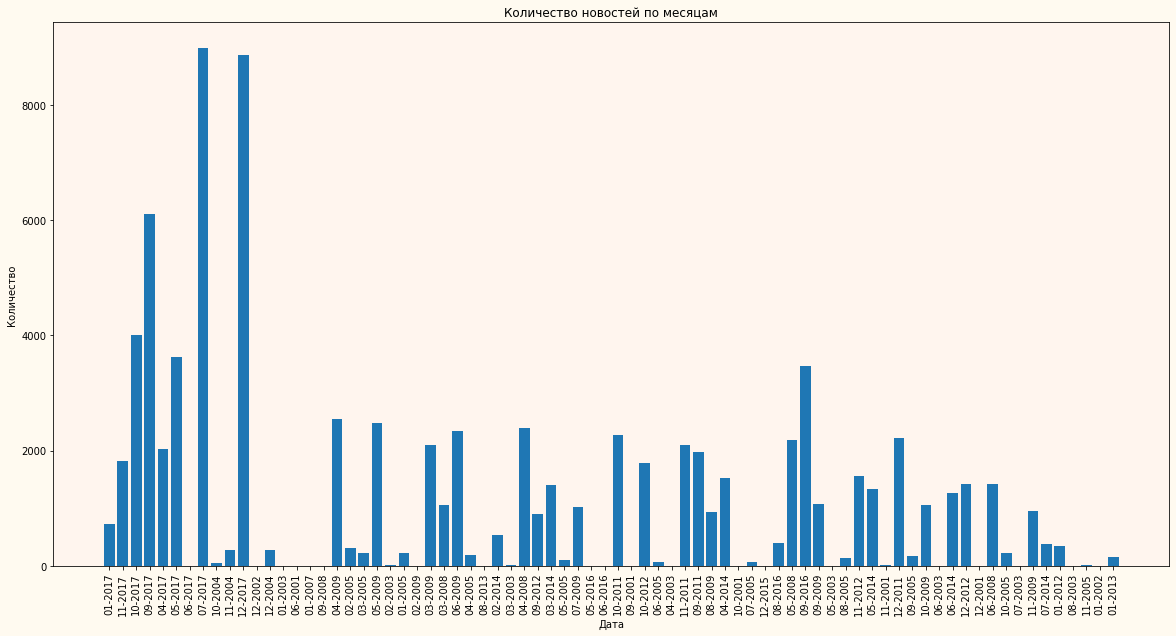

In [38]:
fig, ax = plt.subplots(figsize=(20, 10))
plt.bar(x = month_year.keys(),
        height = month_year.values())
plt.xticks(rotation='vertical')
ax.set_facecolor('seashell')
fig.set_facecolor('floralwhite')

ax.set_title('Количество новостей по месяцам')
ax.set_ylabel('Количество')
ax.set_xlabel('Дата')
plt.show()